In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [6]:
traj = md.load_xtc("Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc", top="Data/1hz3_T310.start.nowater.gro")
traj

<mdtraj.Trajectory with 17 frames, 408 atoms, 26 residues, and unitcells at 0x154c7e0fbb80>

In [15]:
def end_end(traj):
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist
dist = end_end(traj)
print(dist)
print(traj.time)

[2.4080002 2.294153  2.4405324 2.3514538 2.8238873 3.389765  2.9046328
 2.9567354 3.0590065 4.125036  3.451251  3.3695395 2.1477714 2.0729964
 2.562689  2.211393  2.233543 ]
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000.]


In [9]:
Rgndarray = md.compute_rg(traj, masses=None)
Rgndarray

array([0.85057444, 1.00091706, 1.00509146, 0.9700538 , 1.03096215,
       1.08965024, 1.06154491, 1.01728751, 1.0467843 , 1.25890696,
       1.03388204, 1.18969875, 1.03686539, 1.03002704, 1.00622438,
       1.02566947, 1.03948413])

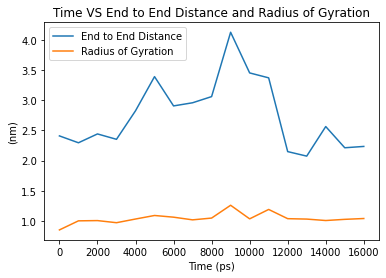

In [10]:
plt.plot(traj.time, dist, label= "End to End Distance")           
plt.plot(traj.time, Rgndarray, label= "Radius of Gyration")       
plt.legend()                     
plt.xlabel('Time (ps)')
plt.ylabel('(nm)')
plt.title('Time VS End to End Distance and Radius of Gyration')
plt.show()

In [11]:
print(dist)
dist_norm = dist/np.max(dist)
print(dist_norm)
print(Rgndarray)
Rgndarray_norm = Rgndarray/np.max(Rgndarray)
print(Rgndarray_norm)

[2.4080002 2.294153  2.4405324 2.3514538 2.8238873 3.389765  2.9046328
 2.9567354 3.0590065 4.125036  3.451251  3.3695395 2.1477714 2.0729964
 2.562689  2.211393  2.233543 ]
[0.5837526  0.5561535  0.5916391  0.57004446 0.6845728  0.8217541
 0.7041473  0.7167781  0.7415709  1.         0.83665967 0.81685096
 0.5206673  0.50254023 0.6212526  0.5360907  0.5414603 ]
[0.85057444 1.00091706 1.00509146 0.9700538  1.03096215 1.08965024
 1.06154491 1.01728751 1.0467843  1.25890696 1.03388204 1.18969875
 1.03686539 1.03002704 1.00622438 1.02566947 1.03948413]
[0.6756452  0.79506833 0.79838423 0.77055242 0.81893435 0.86555264
 0.84322746 0.80807203 0.83150251 1.         0.82125374 0.94502516
 0.82362353 0.81819155 0.79928415 0.81473017 0.82570369]


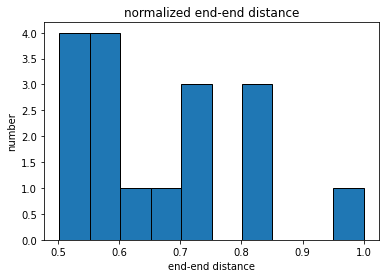

In [12]:
plt.hist(dist_norm, bins=10, edgecolor='black')                     
plt.xlabel('end-end distance')
plt.ylabel('number')
plt.title('normalized end-end distance')
plt.show()

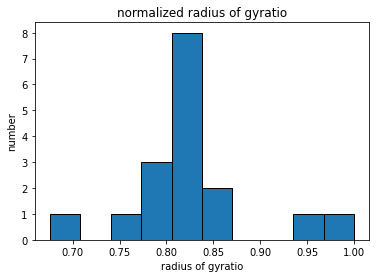

In [14]:
plt.hist(Rgndarray_norm, bins=10, edgecolor='black')                     
plt.xlabel('radius of gyratio')
plt.ylabel('number')
plt.title('normalized radius of gyratio')
plt.show()